# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 Of the four drugs chose to plot using the box plot shown below, we can see that capomulin and ramicane are the most effective drugs. The two drugs produced the lowest tumor volume be the end of the trial. 

In [111]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
ms_df = pd.merge(mouse_metadata, study_results,how = "inner" ,on = ["Mouse ID"])

# Renaming columns to make them lower case and no spaces, and special characters"
ms_df.columns = [i.lower().replace(" ", "_") for i in ms_df.columns]
ms_df.columns = [i.lower().replace("(", "") for i in ms_df.columns]
ms_df.columns = [i.lower().replace(")", "") for i in ms_df.columns]
ms_df.columns = [i.lower().replace("3", "_cubed") for i in ms_df.columns]




# Display the data table for preview
ms_df.head()

,mouse_id,drug_regimen,sex,age_months,weight_g,timepoint,tumor_volume_mm_cubed,metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [112]:
# Checking the number of mice.

ms_df.mouse_id.nunique()

249

In [113]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
ms_df_dup = ms_df[ms_df.duplicated(subset=["mouse_id", "timepoint"])]
ms_df_dup

,mouse_id,drug_regimen,sex,age_months,weight_g,timepoint,tumor_volume_mm_cubed,metastatic_sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [114]:
# Optional: Get all the data for the duplicate mouse ID. 
mask = ms_df.loc[ms_df["mouse_id"]  == "g989", :]

mask

,mouse_id,drug_regimen,sex,age_months,weight_g,timepoint,tumor_volume_mm_cubed,metastatic_sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [115]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
ms_df = ms_df.loc[ms_df["mouse_id"]  != "g989", :]
ms_df.head()

,mouse_id,drug_regimen,sex,age_months,weight_g,timepoint,tumor_volume_mm_cubed,metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [116]:
# Checking the number of mice in the clean DataFrame.
ms_df.mouse_id.nunique()

248

## Summary Statistics

In [117]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df_mean = ms_df.groupby(["drug_regimen"]).tumor_volume_mm_cubed.mean().reset_index()
df_mean = df_mean.rename(columns = {"drug_regimen" : "drug_regimen", 'tumor_volume_mm_cubed' : "Mean Tumor Volume"})

df_median = ms_df.groupby(["drug_regimen"]).tumor_volume_mm_cubed.median().reset_index()
df_median = df_median.rename(columns = {"drug_regimen" : "drug_regimen", 'tumor_volume_mm_cubed' : "Median Tumor Volume"})

df_variance = ms_df.groupby(["drug_regimen"]).tumor_volume_mm_cubed.var().reset_index()
df_variance = df_variance.rename(columns = {"drug_regimen" : "drug_regimen", 'tumor_volume_mm_cubed' : "Tumor Volume Variance"})

df_std = ms_df.groupby(["drug_regimen"]).tumor_volume_mm_cubed.std().reset_index()
df_std = df_std.rename(columns = {"drug_regimen" : "drug_regimen", 'tumor_volume_mm_cubed' : "Tumor Volume Std. Dev."})

df_sem = ms_df.groupby(["drug_regimen"]).tumor_volume_mm_cubed.sem().reset_index()
df_sem = df_sem.rename(columns = {"drug_regimen" : "drug_regimen", 'tumor_volume_mm_cubed' : "Tumor Volume Std. Err."})


df_sum = pd.merge(df_mean, df_median, on = "drug_regimen")
df_sum = pd.merge(df_sum, df_variance, on = "drug_regimen")
df_sum = pd.merge(df_sum, df_std, on = "drug_regimen")
df_sum = pd.merge(df_sum, df_sem, on = "drug_regimen")
df_sum
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,drug_regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [118]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# df_sum = ms_df.agg({"tumor_volume_mm_cubed" : ['mean', 'median']}, axis="columns")
# df_sum

df_sum2 = ms_df.groupby("drug_regimen").agg({"tumor_volume_mm_cubed" : ['mean', 'median', 'var', 'std', 'sem']}, axis="columns")
df_sum2

tumor_volume_mm_cubed                                          
                              mean     median        var       std       sem
drug_regimen                                                                
Capomulin                40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin                 52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol                52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril                 55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol                 54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                  54.033581  52.288934  61.168083  7.821003  0.581331
Propriva                 52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane                 40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn                 54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol                53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

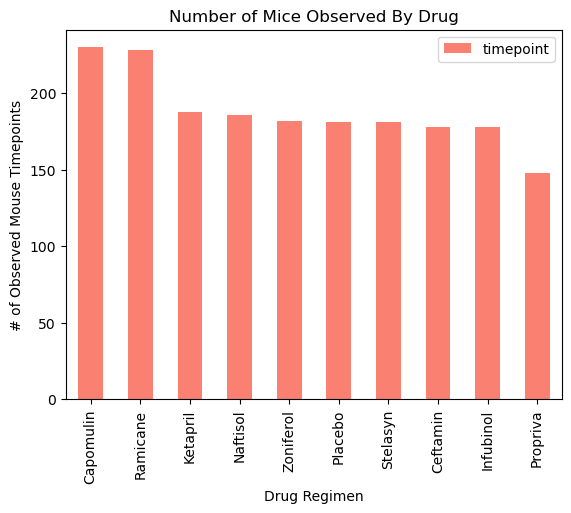

In [119]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
df_bar = ms_df.groupby("drug_regimen")["timepoint"].count().reset_index().sort_values(by="timepoint", ascending=False)
df_bar.plot.bar(x="drug_regimen", y="timepoint", title="Number of Mice Observed By Drug", color="salmon")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

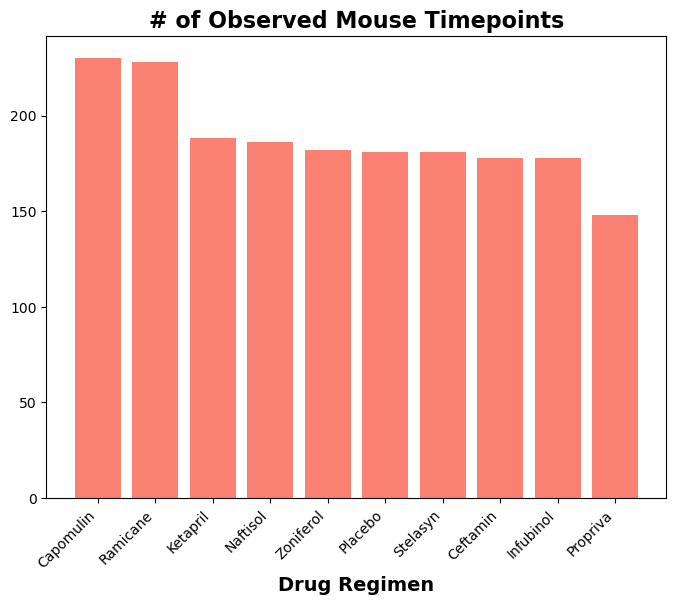

In [120]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x = df_bar.drug_regimen
y = df_bar.timepoint

plt.figure(figsize=(8,6))
plt.bar(x, y, color="salmon")


plt.xlabel("Drug Regimen", fontsize=14, fontweight="bold")
plt.title("# of Observed Mouse Timepoints", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha="right")

plt.show()

<Axes: ylabel='timepoint'>

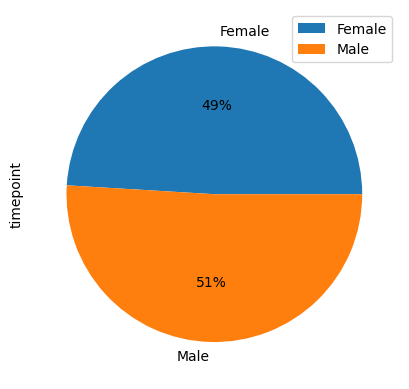

In [121]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# df_pie = ms_df.groupby("sex")["timepoint"].count().reset_index().sort_values(by="timepoint", ascending=False)
ms_df.groupby(["sex"]).count().plot(kind='pie', y="timepoint", autopct='%1.0f%%')


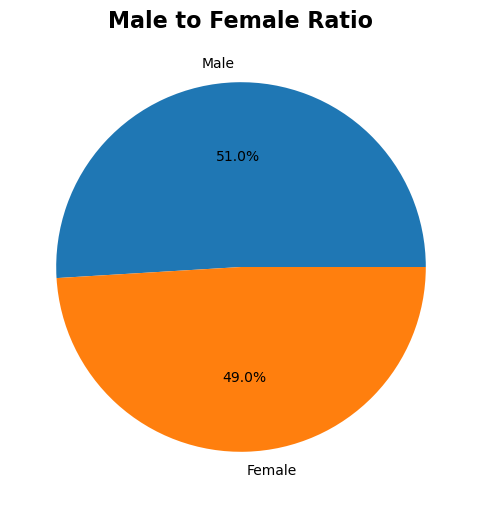

In [122]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
df_pie = ms_df.groupby("sex")["timepoint"].count().reset_index().sort_values(by="timepoint", ascending=False)

x = df_pie.sex
y = df_pie.timepoint

plt.figure(figsize=(8,6))
plt.pie(y, labels = x,  autopct="%1.1f%%")
plt.title("Male to Female Ratio", fontsize=16, fontweight="bold")

plt.show()

## Quartiles, Outliers and Boxplots

In [123]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

ms_df.head()
df_max_mask = ms_df.groupby(["mouse_id", "drug_regimen"]).agg({"timepoint": "max"}).reset_index()
df_max_mask = df_max_mask.loc[(df_max_mask["drug_regimen"] == "Capomulin") | (df_max_mask["drug_regimen"] == "Ramicane") | 
                              (df_max_mask["drug_regimen"] == "Infubinol") | (df_max_mask["drug_regimen"] == "Ceftamin"), :]

df_max_mask

df_max = pd.merge(df_max_mask, ms_df, on = ["mouse_id", "drug_regimen", "timepoint"])
df_max


,mouse_id,drug_regimen,timepoint,sex,age_months,weight_g,tumor_volume_mm_cubed,metastatic_sites
0,a203,Infubinol,45,Female,20,23,67.973419,2
1,a251,Infubinol,45,Female,21,25,65.525743,1
2,a275,Ceftamin,45,Female,20,28,62.999356,3
3,a411,Ramicane,45,Male,3,22,38.407618,1
4,a444,Ramicane,45,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,Ceftamin,45,Female,6,27,68.594745,4
96,y793,Capomulin,45,Male,17,17,31.896238,2
97,y865,Ceftamin,45,Male,23,26,64.729837,3
98,z578,Ramicane,45,Male,11,16,30.638696,0


In [124]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']



# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = df_max.loc[df_max["drug_regimen"] == drug, "tumor_volume_mm_cubed"]
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f'({drug} potential outliers: {outliers})')

(Capomulin potential outliers: Series([], Name: tumor_volume_mm_cubed, dtype: float64))
(Ramicane potential outliers: Series([], Name: tumor_volume_mm_cubed, dtype: float64))
(Infubinol potential outliers: 15    36.321346
Name: tumor_volume_mm_cubed, dtype: float64)
(Ceftamin potential outliers: Series([], Name: tumor_volume_mm_cubed, dtype: float64))


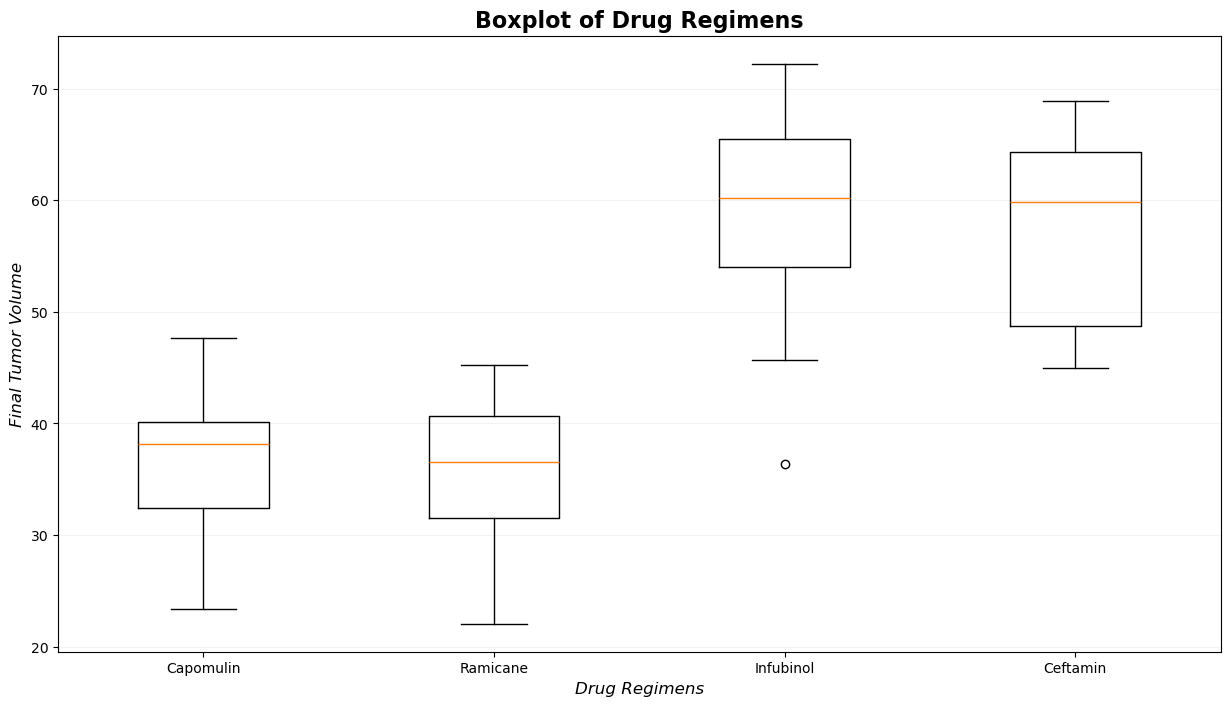

In [125]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

df_capomulin = df_max.loc[df_max["drug_regimen"] == "Capomulin"]
df_ramicane = df_max.loc[df_max["drug_regimen"] == "Ramicane"]
df_infubinol = df_max.loc[df_max["drug_regimen"] == "Infubinol"]
df_ceftamin = df_max.loc[df_max["drug_regimen"] == "Ceftamin"]

x1 = df_capomulin.tumor_volume_mm_cubed
x2 = df_ramicane.tumor_volume_mm_cubed
x3 = df_infubinol.tumor_volume_mm_cubed
x4 = df_ceftamin.tumor_volume_mm_cubed


plt.figure(figsize=(15, 8))

# Step 3: Create the basic plot
plt.boxplot([x1, x2, x3, x4], meanline=True,  labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])


# Step 4: customize
plt.xlabel("Drug Regimens", fontstyle="italic", fontsize=12)
plt.ylabel("Final Tumor Volume", fontstyle="italic", fontsize=12)
plt.title("Boxplot of Drug Regimens", fontsize=16, fontweight="bold")


plt.grid(color="grey", axis="y", alpha=0.1)

# Step 5: show/save
plt.show()

## Line and Scatter Plots

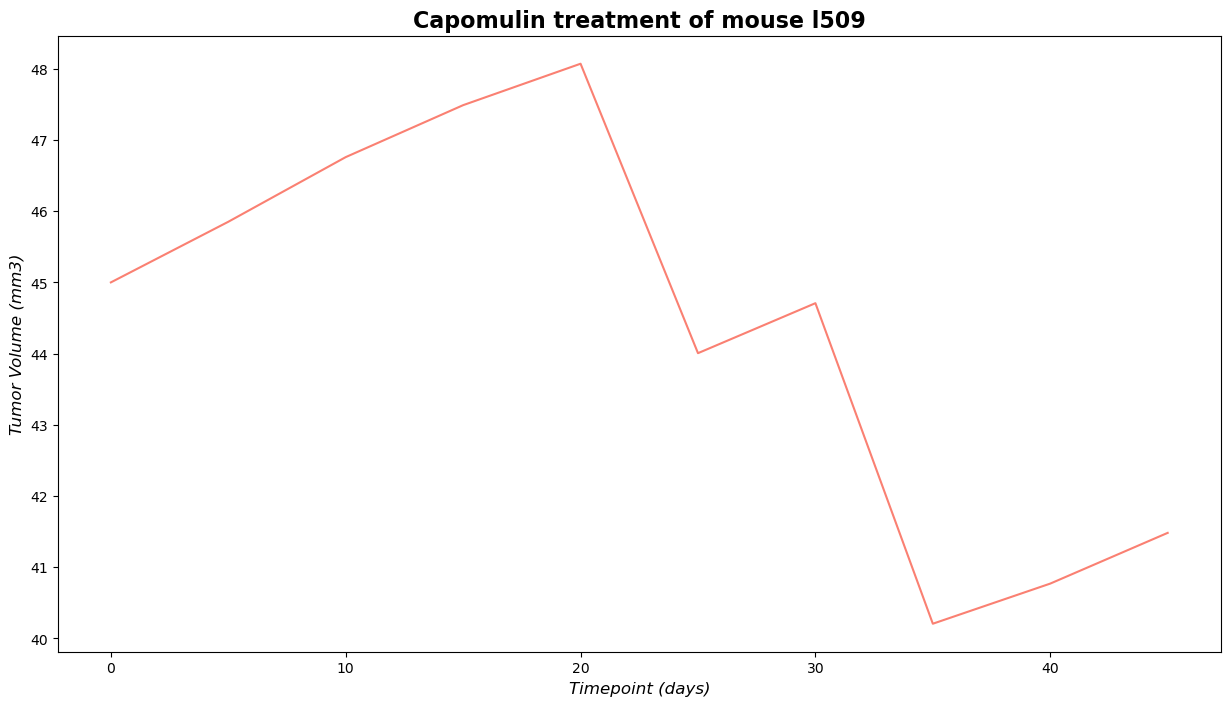

In [126]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_df = ms_df.loc[ms_df["mouse_id"]  == "l509", :]
single_x = single_df.timepoint
single_y = single_df.tumor_volume_mm_cubed

plt.figure(figsize=(15, 8))
plt.plot(single_x, single_y, color = "salmon")

plt.xlabel("Timepoint (days)", fontstyle="italic", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontstyle="italic", fontsize=12)
plt.title("Capomulin treatment of mouse l509", fontsize=16, fontweight="bold")

plt.show()

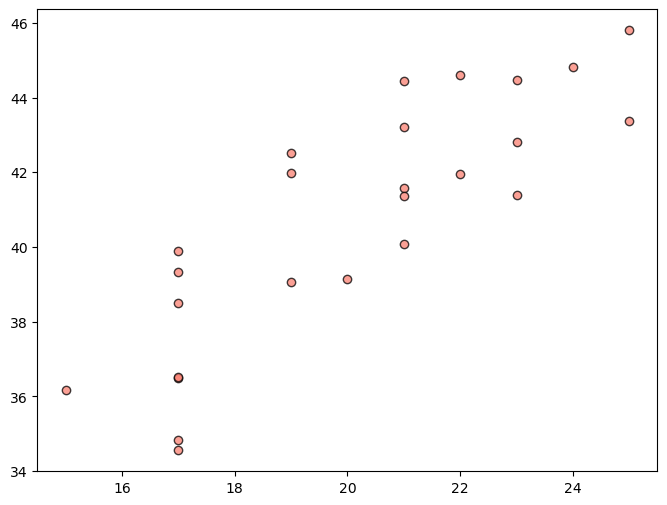

In [127]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
df_capomulin2 = ms_df.loc[ms_df["drug_regimen"]  == "Capomulin", :]
df_capomulin2 = df_capomulin2.groupby(["mouse_id","weight_g"]).agg({"tumor_volume_mm_cubed" : ['mean']}, axis="columns").reset_index()


x12 = df_capomulin2.weight_g
y22 = df_capomulin2["tumor_volume_mm_cubed"]

plt.figure(figsize=(8, 6))
plt.scatter(x12, y22, marker="o", facecolors="salmon", edgecolors="black", alpha=0.75)
plt.show()

## Correlation and Regression

In [128]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


The correlation between mouse weight and tumor volume is 0.8419363424694721


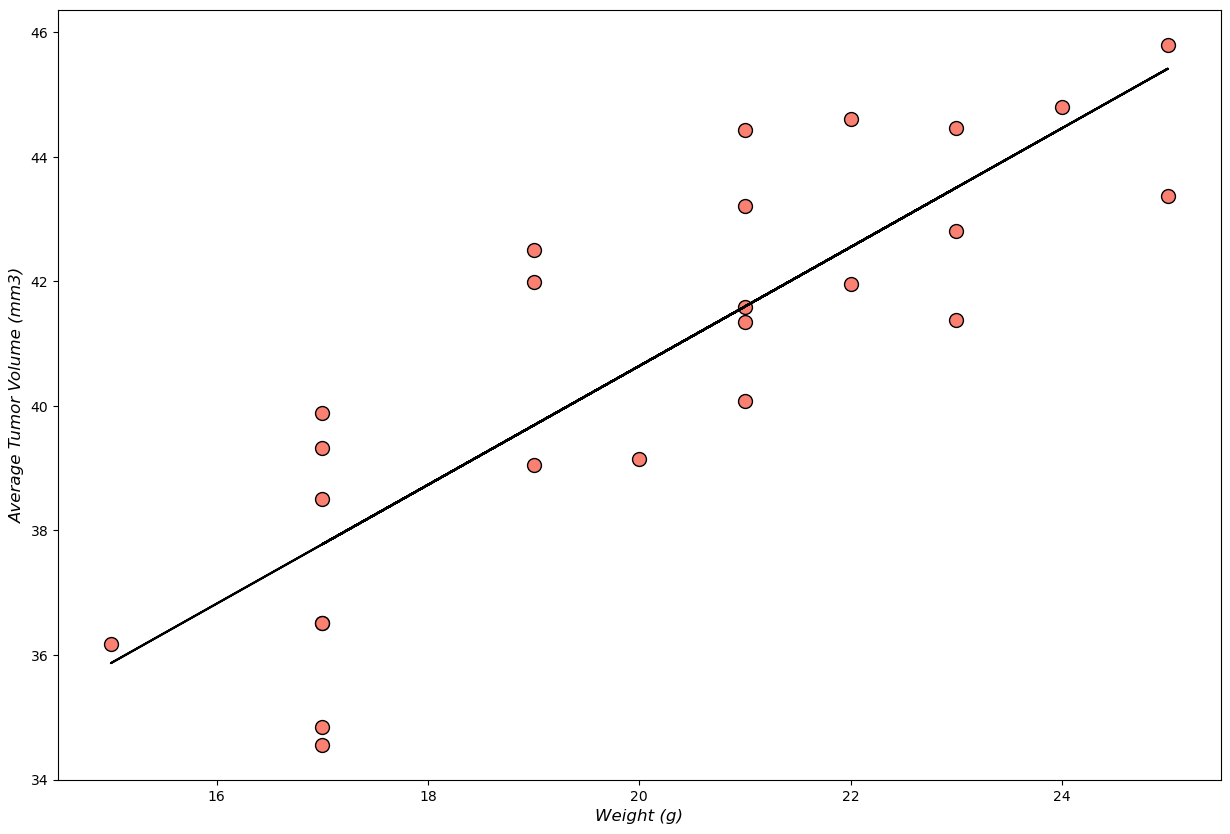

In [129]:
# USING LINREGRESS

sample = pd.DataFrame(df_capomulin2)
sample = sample.rename(columns = {"mouse_id" : "mouse_id", 'weight_g' : "weight_g", "tumor_volume_mm_cubed": "tumor_volume_mm_cubed"})
sample["tumor_volume"] = sample.tumor_volume_mm_cubed
x_values = sample.weight_g
y_values = sample.tumor_volume

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#Fit a linear regression model
model = LinearRegression()
model.fit(sample[["weight_g"]], sample[["tumor_volume_mm_cubed"]])

# # Get the coefficients
slope = model.coef_[0]
intercept = model.intercept_

# # Create the regression line equation
regression_line = slope * sample['weight_g'] + intercept


plt.figure(figsize=(15, 10))
plt.scatter(x_values, y_values, marker="o", facecolors="salmon", edgecolors="black", s = 100)
plt.plot(sample[['weight_g']], regression_line, color='black', label='Regression Line')

plt.xlabel("Weight (g)", fontstyle="italic", fontsize=12)
plt.ylabel("Average Tumor Volume (mm3)", fontstyle="italic", fontsize=12)
##plt.annotate(line_eq,(22, 36),fontsize=15,color="red")
print(f"The correlation between mouse weight and tumor volume is {rvalue}")
plt.show()